In [1]:
import mlrose_hiive as mlrose
import numpy as np
import argparse
import logging
import os
import data
import random as rand
from sklearn import preprocessing
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#load data
    df = pd.read_csv (r'./data/wine.csv')
    dataset ='Wine'

    #preprocessing
    # convert target to binary
    df.loc[df.quality =='bad', "quality"] = 0 #bad wine
    df.loc[df.quality == 'good', "quality"] = 1 #good wine
    #get the target
    y = df.pop('quality')
    #scale features
    X_scaled = preprocessing.scale(df)

    #split train and test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
    
    n_features = X_train.shape[1]

In [3]:
#best models
rhcmodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2], activation ='relu', 
                                        algorithm ='random_hill_climb', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=0.25, early_stopping = True, 
                                        clip_max = 5, max_attempts = 1000,random_state=42, curve =True)

rhcmodel.fit(X_train,y_train)

NeuralNetwork(activation='relu', algorithm='random_hill_climb', bias=True,
              clip_max=5, curve=True, early_stopping=True, hidden_nodes=[16],
              is_classifier=True, learning_rate=0.25, max_attempts=1000,
              max_iters=4000, mutation_prob=0.1, pop_size=200, random_state=42,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [4]:
y_test_pred = rhcmodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.728125

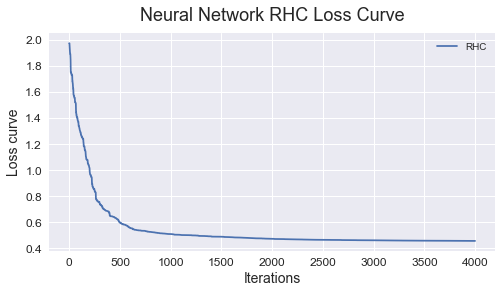

In [5]:
plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(8, 4, forward=True)
#gd_fitness = [i*-1 for i in gdmodel.fitness_curve.tolist()]
plt.plot(range(len(rhcmodel.fitness_curve.tolist())), rhcmodel.fitness_curve, label = 'RHC')
#plt.plot(range(len(samodel_play.fitness_curve.tolist())), samodel_play.fitness_curve, label = 'SA')
#plt.plot(range(len(gamodel.fitness_curve.tolist())), gamodel.fitness_curve, label = 'GA')
#plt.plot(range(len(gdmodel.fitness_curve.tolist())), gd_fitness, label = 'Gradient Descent')

plt.ylabel('Loss curve', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('Neural Network RHC Loss Curve', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,1.5)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [6]:
samodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2],
                                        activation ='relu', 
                                        algorithm ='simulated_annealing', 
                                        max_iters = 10000, bias = True, is_classifier = True, 
                                        learning_rate=0.04, early_stopping = True, schedule=mlrose.ExpDecay(init_temp=100.0, exp_const=0.1, min_temp=0.001),
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)

samodel.fit(X_train,y_train)

NeuralNetwork(activation='relu', algorithm='simulated_annealing', bias=True,
              clip_max=5, curve=True, early_stopping=True, hidden_nodes=[16],
              is_classifier=True, learning_rate=0.04, max_attempts=25,
              max_iters=10000, mutation_prob=0.1, pop_size=200, random_state=42,
              restarts=0,
              schedule=ExpDecay(init_temp=100.0, exp_const=0.1, min_temp=0.001))

In [7]:
y_test_pred = samodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.734375

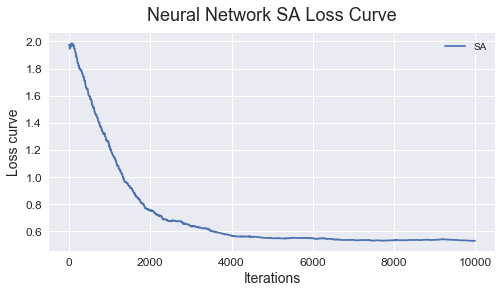

In [8]:
plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(8, 4, forward=True)
#gd_fitness = [i*-1 for i in gdmodel.fitness_curve.tolist()]
#plt.plot(range(len(rhcmodel.fitness_curve.tolist())), rhcmodel.fitness_curve, label = 'RHC')
plt.plot(range(len(samodel.fitness_curve.tolist())), samodel.fitness_curve, label = 'SA')
#plt.plot(range(len(gamodel.fitness_curve.tolist())), gamodel.fitness_curve, label = 'GA')
#plt.plot(range(len(gdmodel.fitness_curve.tolist())), gd_fitness, label = 'Gradient Descent')

plt.ylabel('Loss curve', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('Neural Network SA Loss Curve', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,1.5)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [9]:
gamodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2], activation ='relu', 
                                        algorithm ='genetic_alg', 
                                        max_iters = 1000, bias = True, is_classifier = True, 
                                        learning_rate=0.0001, early_stopping = True, mutation_prob=.025,
                                        clip_max=5, max_attempts = 500, pop_size=200,random_state=42,curve =True)
gamodel.fit(X_train,y_train)

NeuralNetwork(activation='relu', algorithm='genetic_alg', bias=True, clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[16],
              is_classifier=True, learning_rate=0.0001, max_attempts=500,
              max_iters=1000, mutation_prob=0.025, pop_size=200,
              random_state=42, restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [10]:
y_test_pred = gamodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.75625

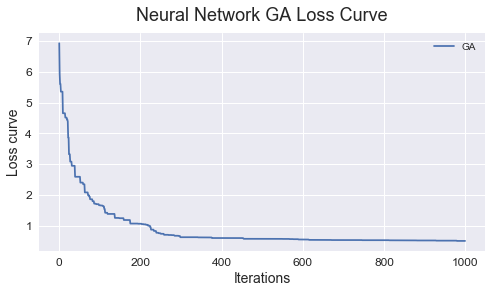

In [11]:
plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(8, 4, forward=True)
#gd_fitness = [i*-1 for i in gdmodel.fitness_curve.tolist()]
#plt.plot(range(len(rhcmodel.fitness_curve.tolist())), rhcmodel.fitness_curve, label = 'RHC')
#plt.plot(range(len(samodel.fitness_curve.tolist())), samodel.fitness_curve, label = 'SA')
plt.plot(range(len(gamodel.fitness_curve.tolist())), gamodel.fitness_curve, label = 'GA')
#plt.plot(range(len(gdmodel.fitness_curve.tolist())), gd_fitness, label = 'Gradient Descent')

plt.ylabel('Loss curve', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('Neural Network GA Loss Curve', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,1.5)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [12]:
gdmodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2], activation ='relu', 
                                        algorithm ='gradient_descent', 
                                        max_iters = 5000, bias = True, is_classifier = True, 
                                        learning_rate=0.00004, early_stopping = True, 
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)
gdmodel.fit(X_train,y_train)

NeuralNetwork(activation='relu', algorithm='gradient_descent', bias=True,
              clip_max=5, curve=True, early_stopping=True, hidden_nodes=[16],
              is_classifier=True, learning_rate=4e-05, max_attempts=25,
              max_iters=5000, mutation_prob=0.1, pop_size=200, random_state=42,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [13]:
y_test_pred = gdmodel.predict(X_test)
accuracy_score(y_test, y_test_pred)#0.000002

0.7625

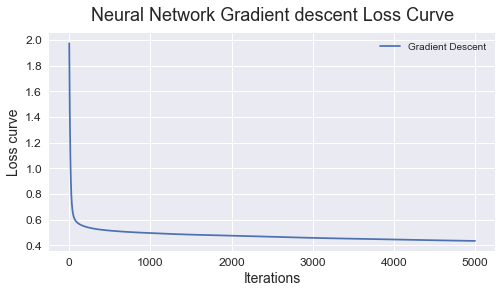

In [14]:
plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(8,4, forward=True)
gd_fitness = [i*-1 for i in gdmodel.fitness_curve.tolist()]
#plt.plot(range(len(rhcmodel.fitness_curve.tolist())), rhcmodel.fitness_curve, label = 'RHC')
#plt.plot(range(len(samodel.fitness_curve.tolist())), samodel.fitness_curve, label = 'SA')
#plt.plot(range(len(gamodel.fitness_curve.tolist())), gamodel.fitness_curve, label = 'GA')
plt.plot(range(len(gdmodel.fitness_curve.tolist())), gd_fitness, label = 'Gradient Descent')

plt.ylabel('Loss curve', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('Neural Network Gradient descent Loss Curve', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,1.5)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [15]:
#RHC HP - Learning rate plot
rhc_lr = [0.001,0.01,0.025,2.0,10]
rhc_accuracy = []
for lr in rhc_lr:
    rhcmodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2], activation ='relu', 
                                        algorithm ='random_hill_climb', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=lr, early_stopping = True, 
                                        clip_max = 5, max_attempts = 1000,random_state=42, curve =True)
    rhcmodel.fit(X_train,y_train)
    y_test_pred = rhcmodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    rhc_accuracy.append(accuracy)


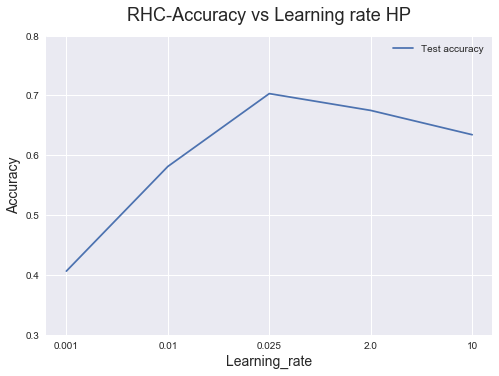

In [16]:
#plot curve for learning_rate
rhc_learning_rate_range = ['0.001','0.01','0.025','2.0','10']
plt.style.use('seaborn')
plt.plot(rhc_learning_rate_range, rhc_accuracy, label = 'Test accuracy')
#plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Learning_rate', fontsize = 14)
plt.title('RHC-Accuracy vs Learning rate HP', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.3,0.8)
plt.show()

In [17]:
#SA HP - Temperature plot
sa_init_temp = [1,10,100,1000]
sa_accuracy = []
for temp in sa_init_temp:
    samodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2],
                                        activation ='relu', 
                                        algorithm ='simulated_annealing', 
                                        max_iters = 10000, bias = True, is_classifier = True, 
                                        learning_rate=0.04, early_stopping = True, schedule=mlrose.ExpDecay(init_temp=temp, exp_const=0.1, min_temp=0.001),
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)
    samodel.fit(X_train,y_train)
    y_test_pred = samodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    sa_accuracy.append(accuracy)


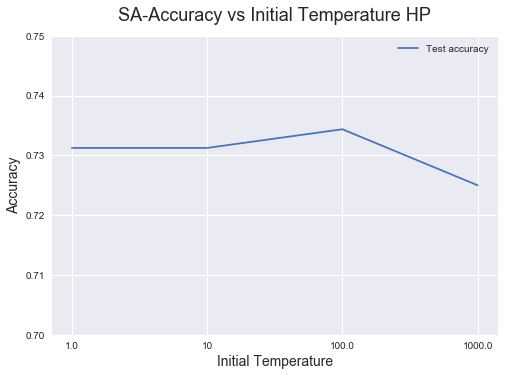

In [18]:
#plot  curve for learning_rate
sa_init_temp_range = ['1.0','10','100.0','1000.0']
plt.style.use('seaborn')
plt.plot(sa_init_temp_range, sa_accuracy, label = 'Test accuracy')
#plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Initial Temperature', fontsize = 14)
plt.title('SA-Accuracy vs Initial Temperature HP', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.70,0.75)
plt.show()

In [19]:
#GA HP - Population size plot
ga_pop_size = [10,100,200,1000]
ga_accuracy = []
for pop in ga_pop_size:
    gamodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2], activation ='relu', 
                                        algorithm ='genetic_alg', 
                                        max_iters = 1000, bias = True, is_classifier = True, 
                                        learning_rate=0.0001, early_stopping = True, mutation_prob=.025,
                                        clip_max=5, max_attempts = 500, pop_size=pop,random_state=42,curve =True)
    gamodel.fit(X_train,y_train)
    y_test_pred = gamodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    ga_accuracy.append(accuracy)


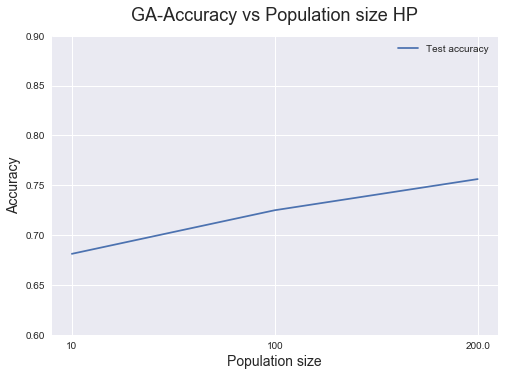

In [21]:
#plot curve for Population size
#ga_accuracy.append(0.68125)
ga_init_temp_range = ['10','100','200.0','1000']
plt.style.use('seaborn')
plt.plot(ga_init_temp_range, ga_accuracy, label = 'Test accuracy')
#plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Population size', fontsize = 14)
plt.title('GA-Accuracy vs Population size HP', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.60,0.9)
plt.show()

In [ ]:
#GD HP - Population size plot
gd_learning_size = [0.000001,0.000002,0.000005,0.00004,0.0001,0.001,0.01,0.1,1]
gd_accuracy = []
for gd_lr in gd_learning_size:
    gdmodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2], activation ='relu', 
                                        algorithm ='gradient_descent', 
                                        max_iters = 5000, bias = True, is_classifier = True, 
                                        learning_rate=gd_lr, early_stopping = True, 
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)
    gdmodel.fit(X_train,y_train)
    y_test_pred = gdmodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    gd_accuracy.append(accuracy)


In [ ]:
#plot validation curve for learning_rate
gd_lr_range = ['0.000001','0.000002','0.000005','0.00004','0.0001','0.001','0.01','0.1','1']
plt.style.use('seaborn')
plt.plot(gd_lr_range, gd_accuracy, label = 'Test accuracy')
#plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Learning rate', fontsize = 14)
plt.title('GD-Accuracy vs Learning rate HP', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.30,0.9)
plt.show()

In [ ]:
#best models time metric
time_list = []
start = time.time()
rhcmodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2], activation ='relu', 
                                        algorithm ='random_hill_climb', 
                                        max_iters = 4000, bias = True, is_classifier = True, 
                                        learning_rate=0.25, early_stopping = True, 
                                        clip_max = 5, max_attempts = 1000,random_state=42, curve =True)

rhcmodel.fit(X_train,y_train)
y_test_pred = rhcmodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

end = time.time()
time_list.append(end - start)


start = time.time()
samodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2],
                                        activation ='relu', 
                                        algorithm ='simulated_annealing', 
                                        max_iters = 10000, bias = True, is_classifier = True, 
                                        learning_rate=0.04, early_stopping = True, schedule=mlrose.ExpDecay(init_temp=100.0, exp_const=0.1, min_temp=0.001),
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)

samodel.fit(X_train,y_train)

y_test_pred = samodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

end = time.time()
time_list.append(end - start)


start = time.time()
gamodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2], activation ='relu', 
                                        algorithm ='genetic_alg', 
                                        max_iters = 1000, bias = True, is_classifier = True, 
                                        learning_rate=0.0001, early_stopping = True, mutation_prob=.025,
                                        clip_max=5, max_attempts = 500, pop_size=200,random_state=42,curve =True)
gamodel.fit(X_train,y_train)

y_test_pred = gamodel.predict(X_test)
accuracy_score(y_test, y_test_pred)

end = time.time()
time_list.append(end - start)

start = time.time()
gdmodel = mlrose.NeuralNetwork(hidden_nodes = [3*n_features//2], activation ='relu', 
                                        algorithm ='gradient_descent', 
                                        max_iters = 5000, bias = True, is_classifier = True, 
                                        learning_rate=0.00004, early_stopping = True, 
                                        clip_max=5, max_attempts = 25,random_state=42,curve =True)
gdmodel.fit(X_train,y_train)

y_test_pred = gdmodel.predict(X_test)
accuracy_score(y_test, y_test_pred)#0.000002
end = time.time()
time_list.append(end - start)



In [ ]:
plt.bar(['RHC','SA','GA','GD'],time_list)
plt.ylabel('Wall clock time', fontsize = 14)
plt.xlabel('Algorithms', fontsize = 14)
plt.title('Wall clock time', fontsize = 18, y = 1.03)
plt.show()

In [ ]:
test_accuracy = [0.72,0.73,0.75,0.76]
plt.bar(['RHC','SA','GA','G-D'],test_accuracy)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Algorithms', fontsize = 14)
plt.title('Accuracy', fontsize = 18, y = 1.03)
plt.ylim(0.6,0.8)
plt.show()